# HR Analytics Project : Understanding the Attrition in HR

Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# Importing required libraries for our project
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# lets load the Csv file provided to import data
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


 * Here we can see that there are 1470 rows and 35 columns.

In [3]:
# Lets check first 10 rows of the dataset
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
# Lets check last 5 rows of the dataset
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# Exploring Data Sets :

In [5]:
# checking the name of the columns and datatypes in the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

* Here we can see list of all the columns present in the dataset with our target column too i.e Attrition

* Here in the dataset i can observe that there are some columns which seems to be not required for the project for predicition of employee Atrrition for eg. over 18 ( everybody working in office will obviously ve over 18), There is a column name Employee count( which consist 1 in all the rows), Standard Hours( 80 hrs in all the rows)etc.

In [6]:
# now lets see the name of columns present in the dataset
df.shape

(1470, 35)

In [7]:
# Checking the dataset for any missing values present or not?
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

* Here we can see that there are no null/NaN values present in the dataset.

In [8]:
# lets check the Statistical summary of the dataset provided, studying and observing the data.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* We can see that presence of outliers and skewness present in some of the columns, outliers are present in Daily Rate, Distance From Home, Stock option Level, Total Working Years, years at company, years in current role, years Since last Promotion, Years With Curr Manager.
* Skewness present in DistanceFromHome, YearsAtCompany, Years in Current Role, Years since Last Promotion, Years With Curr Manager.

In [9]:
df["EmployeeNumber"].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

* Here we can see that Employeenumber consists of continuous numeric data these maybe are id's of Employee which is not required to predict the attrition rate.

In [10]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

* Here we can see that EmployeeCount consists of same numeric data (1) which is not required to predict the attrition rate.

In [11]:
df["StandardHours"].unique()

array([80], dtype=int64)

* Here we can see that StandardHours consists of same Standard hours data (80) for all the employees which is not required to predict the attrition rate.

In [12]:
df["Over18"].unique()

array(['Y'], dtype=object)

* Here we can see that Over18 consists of same Standard hours data ('Y') for all the employees, as nobody below 18 is allowed to work, and is not required to predict the attrition rate.

In [13]:
# Dropping the columns which are not required for our project
df.drop(["EmployeeNumber","EmployeeCount","StandardHours","Over18"],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


* Here we can check that we dropped the columns successfully which we did not require for our project

In [14]:
# Lets check the Atrrition column given in the dataset provided.
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

* We can see that out of 1470 Employees, 1233 Employees are still working with the company and 237 Employees have left the company due to various reasons.

<function matplotlib.pyplot.show(close=None, block=None)>

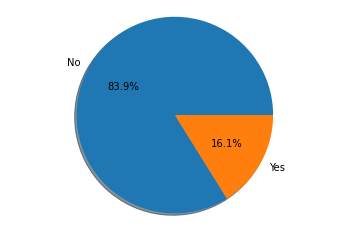

In [15]:
# Lets see the Attrition column using the pie plot
# lets import required libraries for pie plot
from matplotlib import pyplot as plt
a=df["Attrition"].value_counts()
plt.pie(a,labels=a.index, shadow=True, autopct="%0.1f%%")
plt.axis("equal")
plt.show

* so, we can say that attrition rate is somewhere around 16% in the given dataset.

<AxesSubplot:xlabel='Age', ylabel='count'>

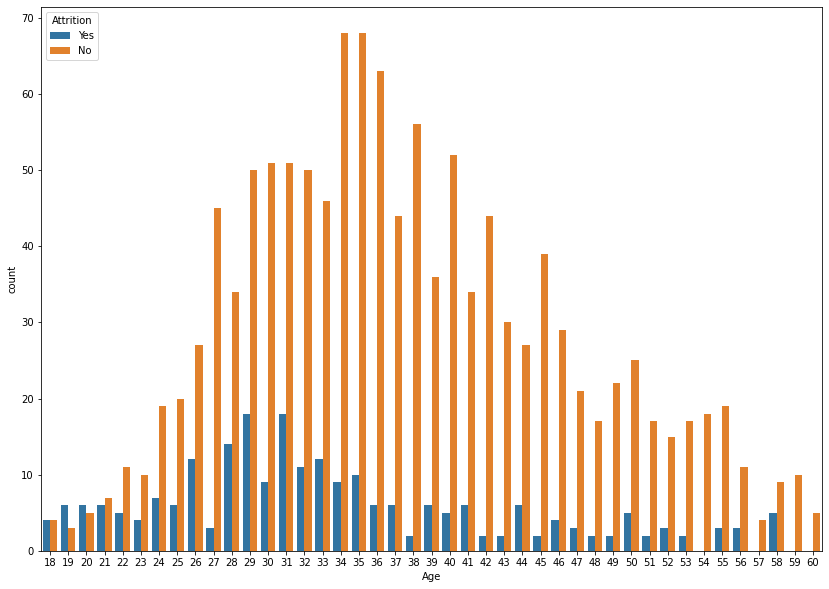

In [16]:
# Lets check the Attrition as per age to get more insights from the data
plt.subplots(figsize=(14,10))
sns.countplot(x="Age", hue="Attrition", data=df)

* Here we can see that people in the age group of 26 to 33 left the company most, so attrition rate seems very high in that age group.
* While People in the age group of 34 to 40 are highest to stay in the company.

In [17]:
# Lets check all the columns and their unique values
for i in df.columns:
    if df[i].dtype==object:
        print(str(i)+ " : "+ str(df[i].unique()) )
        print(df[i].value_counts())
        print("*******************************************")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
*******************************************
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*******************************************
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*******************************************
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
*******************************************
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
*************

In [18]:
# Lets check the correlation of all columns with target column

df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


* We can't check the correlation of feature columns with our target column Attrition, aas our target column's dtype is object, lets convert it to int64 type by giving them values 0,1.

In [19]:
# Lets change the values of yes and no to numeric values
df["Attrition"]=df["Attrition"].replace("No",0).replace("Yes",1)

In [20]:
# lets check the correlation among columns
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [21]:
df["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

<AxesSubplot:>

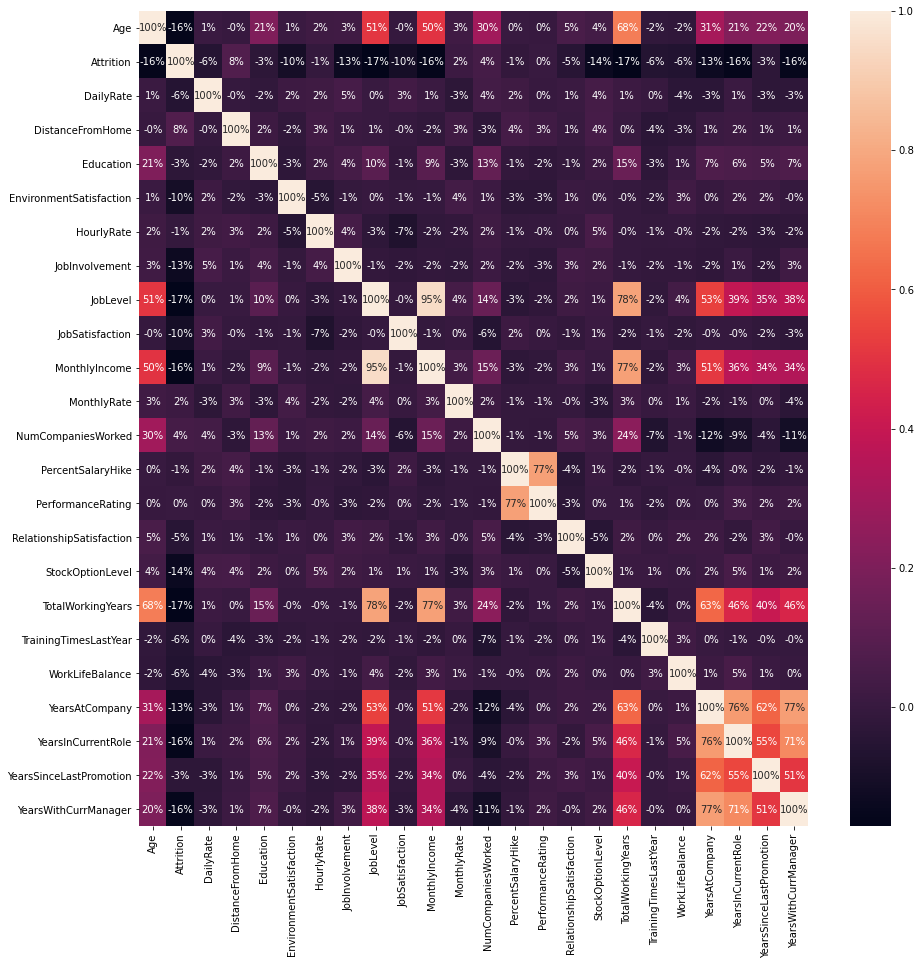

In [22]:
# Lets visualize the correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

# Bivariate Analysis:

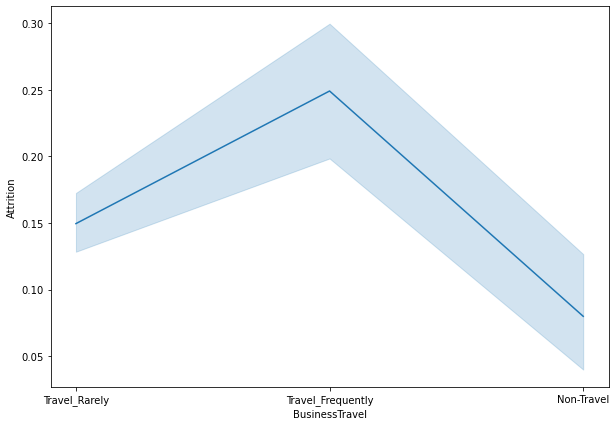

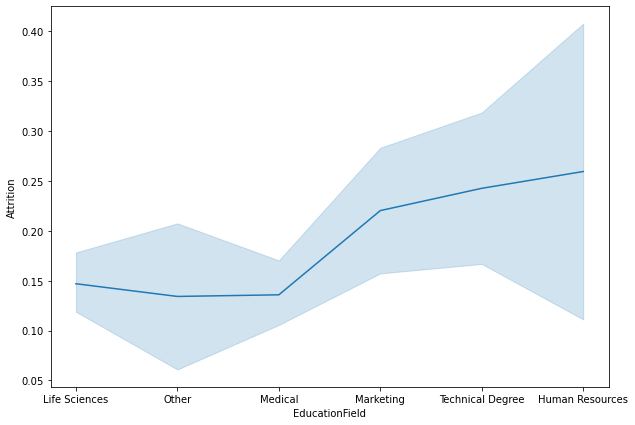

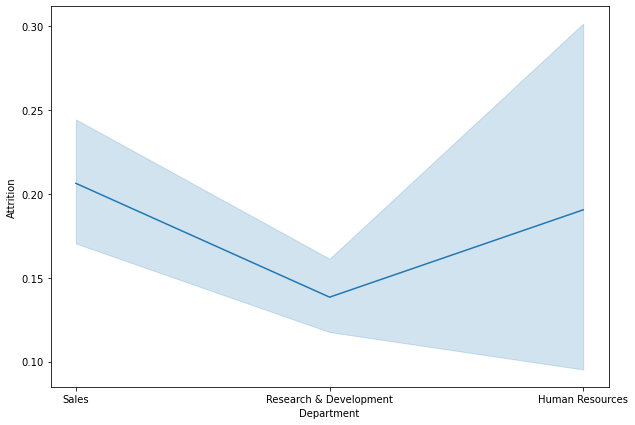

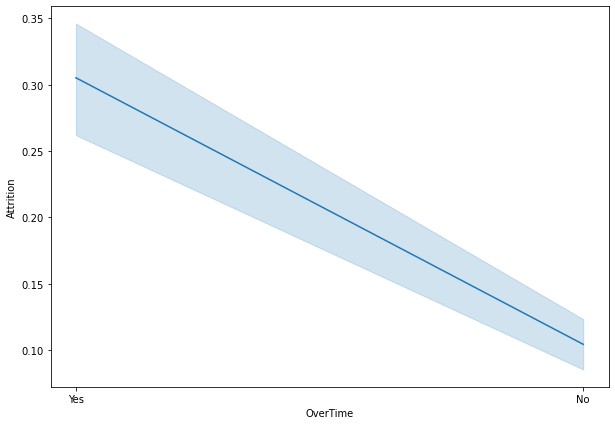

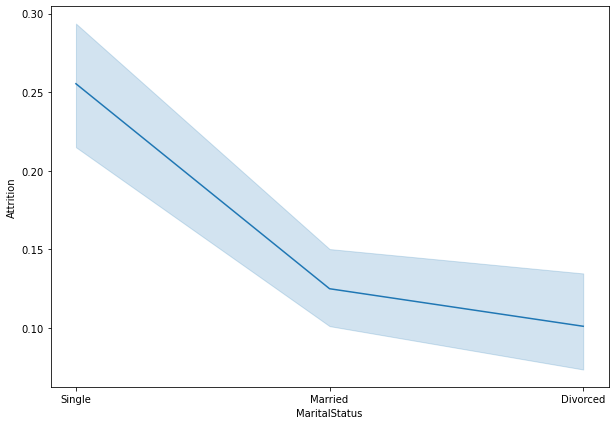

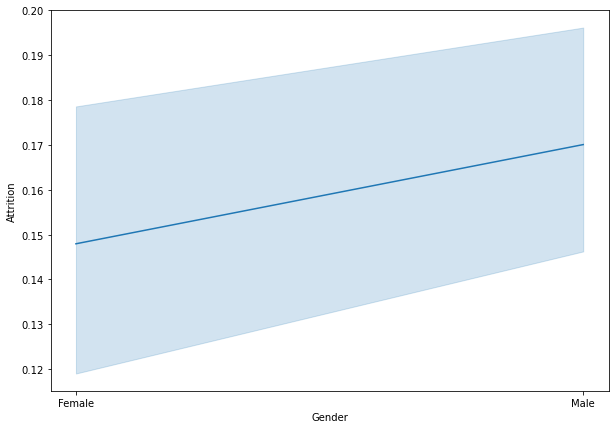

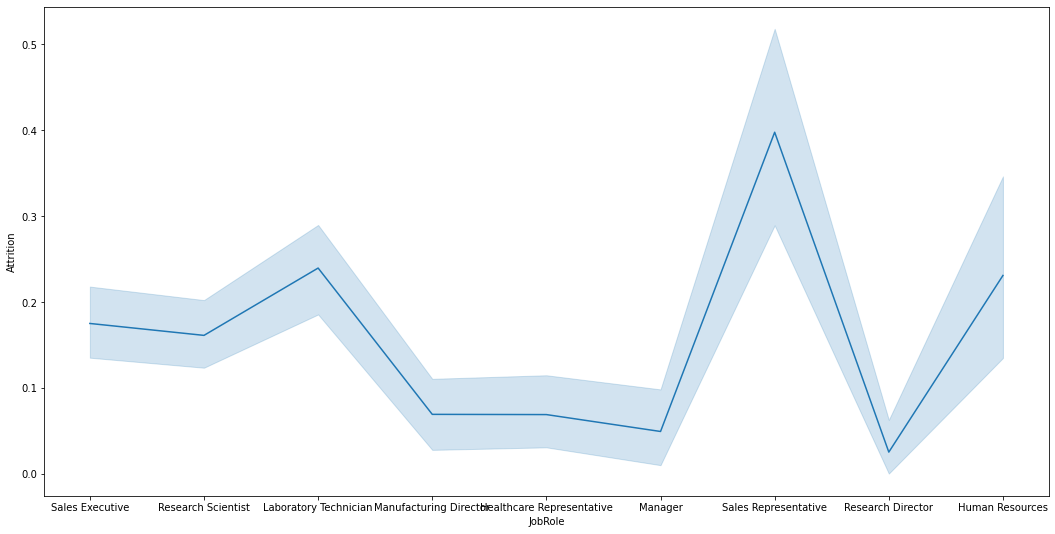

In [23]:
# Checking Correlation of Target columns with other columns.
plt.figure(figsize=(10,7))
sns.lineplot(y="Attrition",x="BusinessTravel",data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.lineplot(x="EducationField",y="Attrition",data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.lineplot(x="Department",y="Attrition",data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.lineplot(x="OverTime",y="Attrition",data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.lineplot(x="MaritalStatus",y="Attrition",data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.lineplot(x="Gender",y="Attrition",data=df)
plt.show()

plt.figure(figsize=(18,9))
sns.lineplot(x="JobRole",y="Attrition",data=df)
plt.show()


* Here we can see that Attrition rate is high among Employees who are travelling frequently on business trips and lowest among the people who don't travel.
* Employees from EducationField Marketing, Technical Degree and Human Resources has highest Attrition Rate.
* Employees from sales department has highest Attrition rate, then Human Resource department and least in Research an Development Department.
* Attrition Rate is High among the Employees who work Overtime.
* Attrition rate is high among the Employees who are Single and least who are Divorced.
* Female stay in same job more than male.
* Highest Attrition rate is among Sales Representative job Role, then Human Resource and Laboratory Technician amd least among Manager and Research Director.

# Multivariate Analysis:

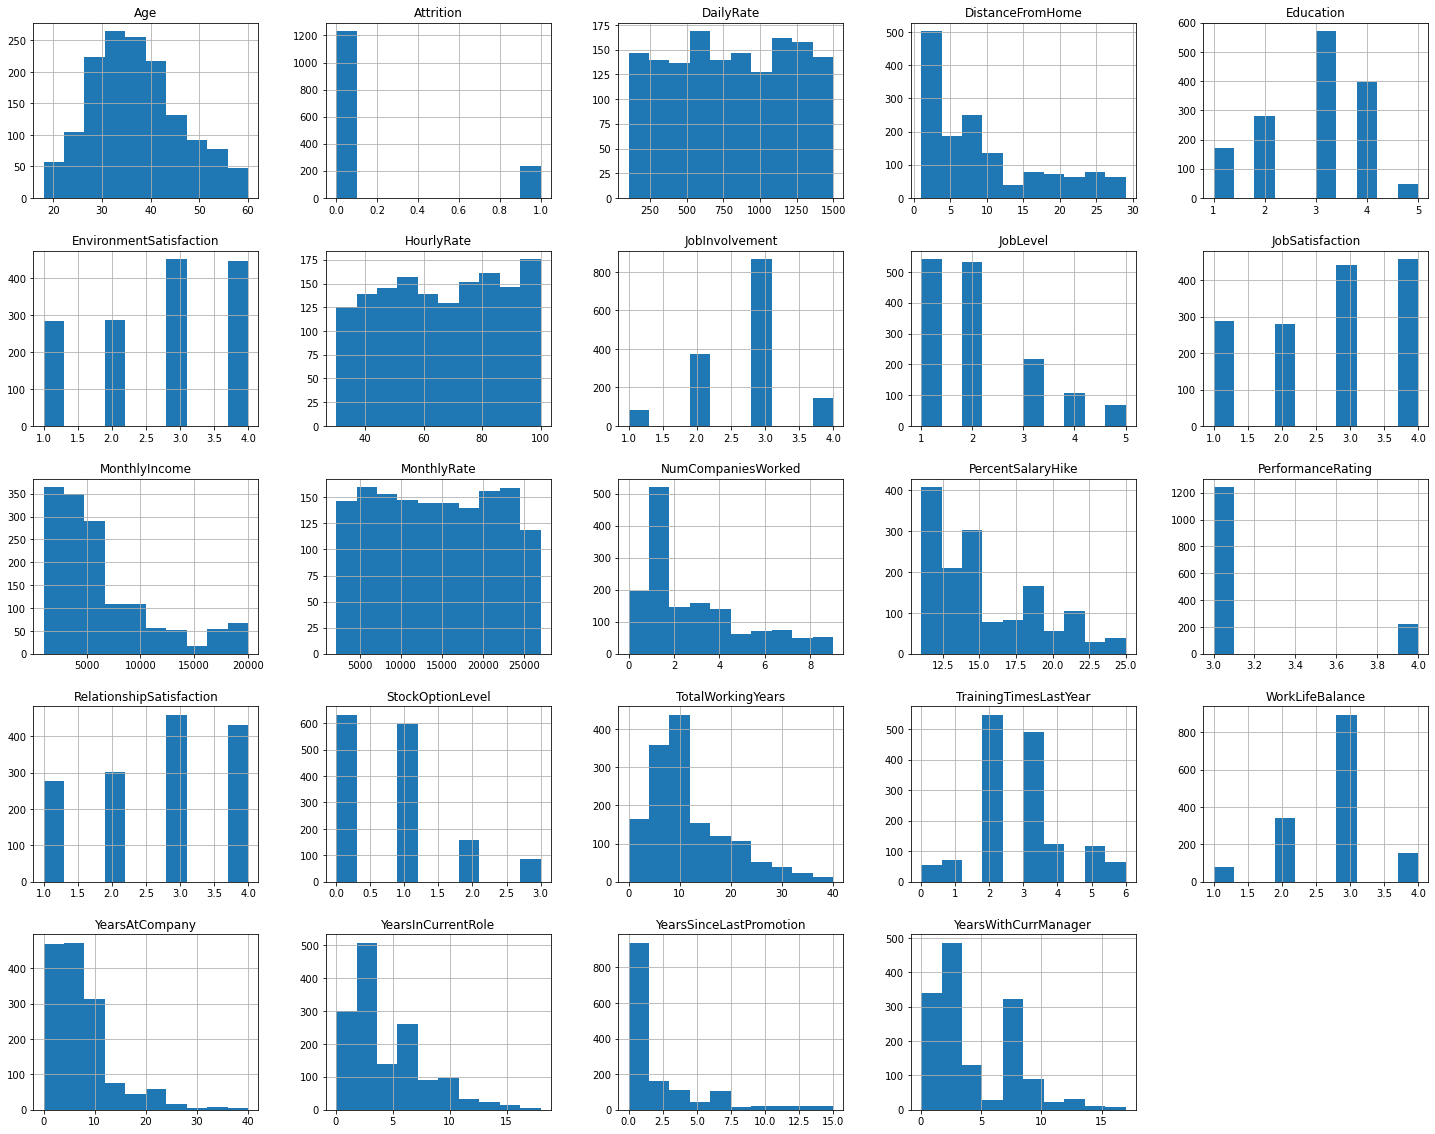

In [24]:
# Visualizing all columns using histogram
df.hist(figsize=(25,20))
plt.show()

In [25]:
# lets convert all object columns to numeric columns using LabelEncoder
# importing required Library
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
for i in df.columns:
    if df[i].dtype == np.number:
        continue
    df[i]= LabelEncoder().fit_transform(df[i])

In [26]:
# Renaming Age column to dob(age)
df["Dob(Age)"]= df["Age"]
# Droping the column Age to remove same data
df= df.drop("Age", axis = 1)
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dob(Age)
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


# Remove Outliers:

In [27]:
# Removing outliers using Z Score.
#Importing Libraries for Z Score
from scipy.stats import zscore
zs = np.abs(zscore(df))
threshold=3
df1= df[(zs<3).all(axis=1)]
print("Previous shape: ", df.shape)
print("Current Shape: ", df1.shape)
print("Data Lost: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Previous shape:  (1470, 31)
Current Shape:  (1387, 31)
Data Lost:  5.646258503401361


* Here we have lost 83 rows which stands 5.6% data using Zscore for removing Outliers which is managable.

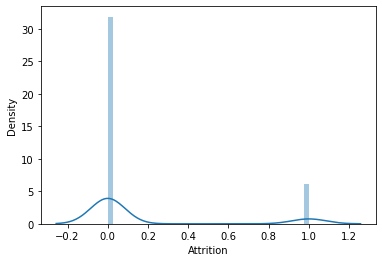

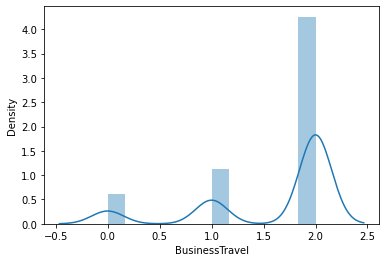

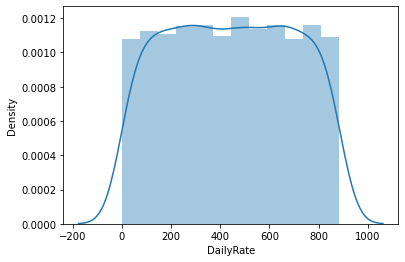

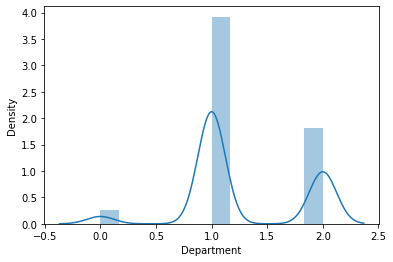

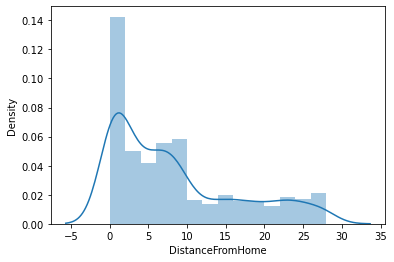

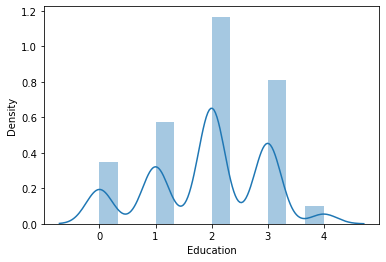

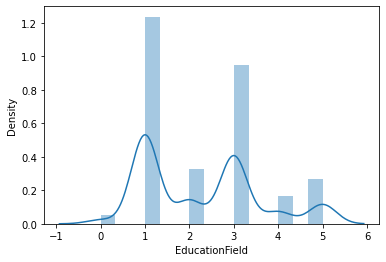

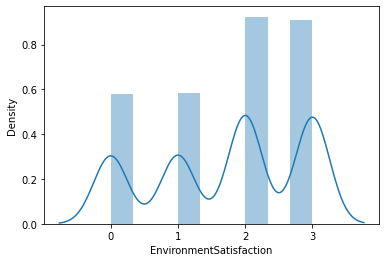

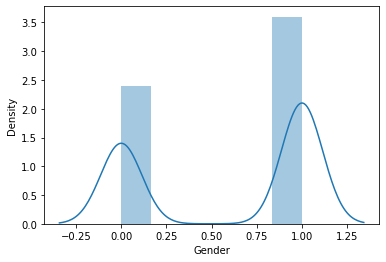

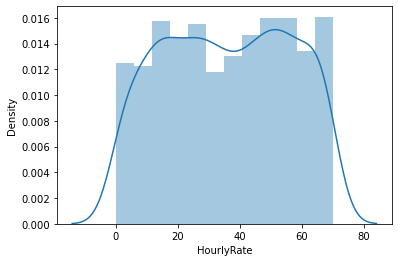

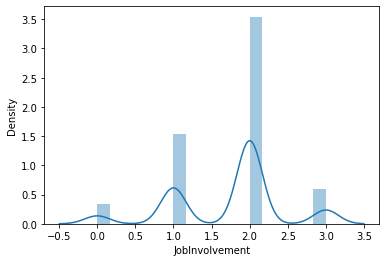

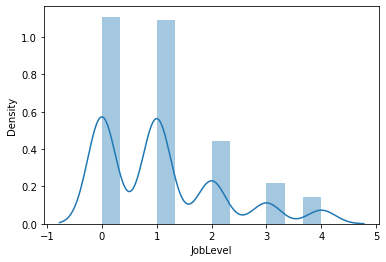

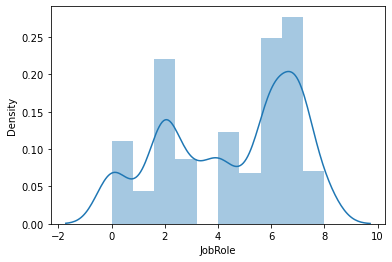

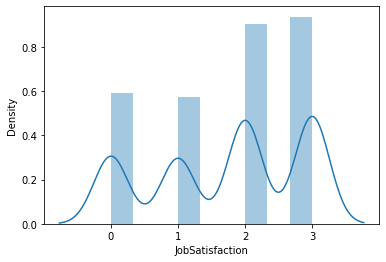

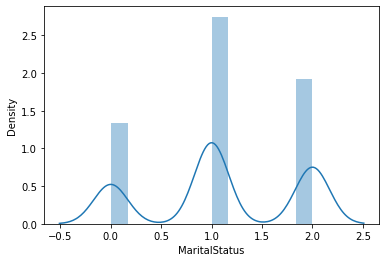

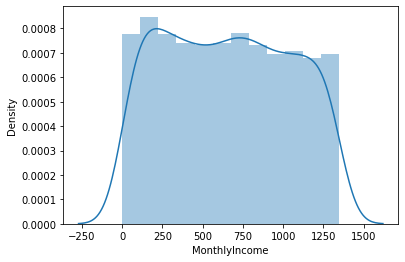

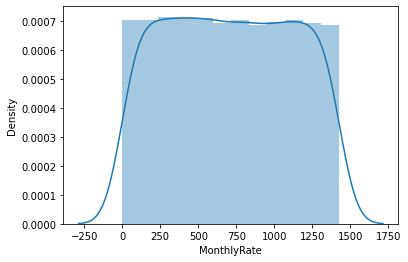

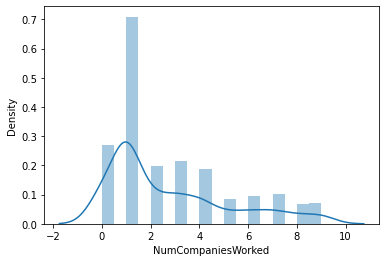

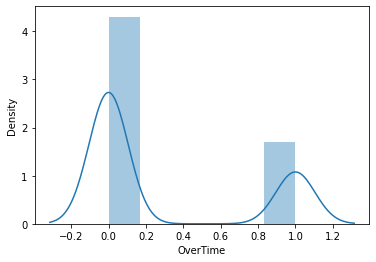

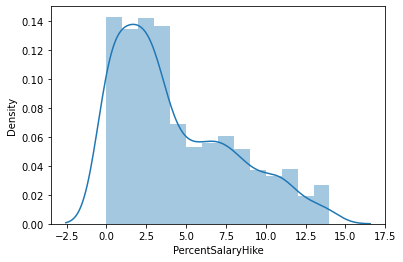

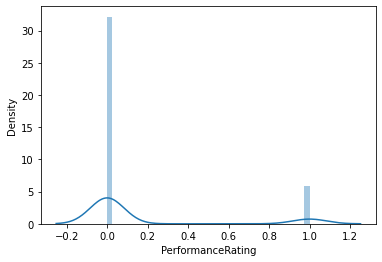

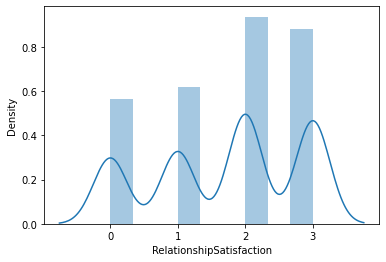

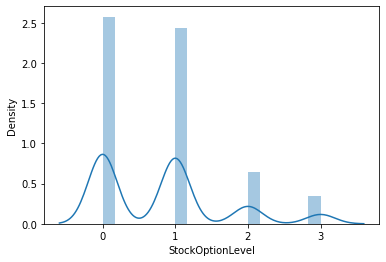

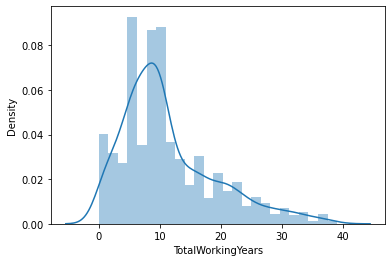

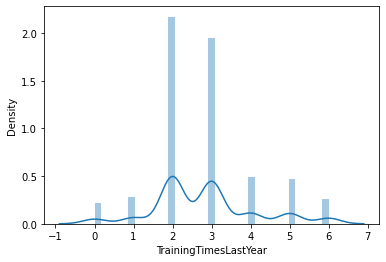

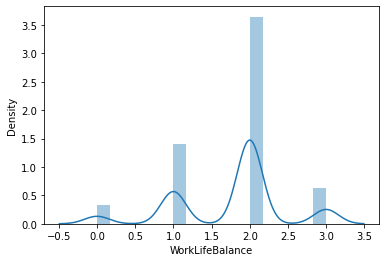

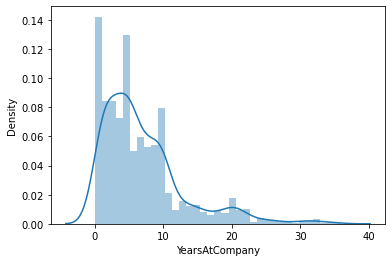

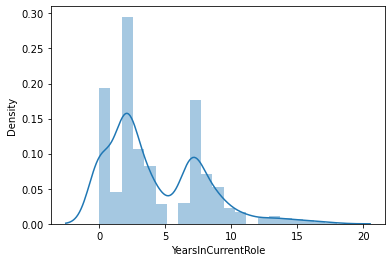

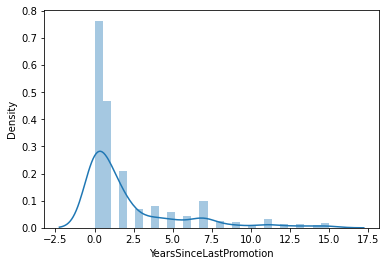

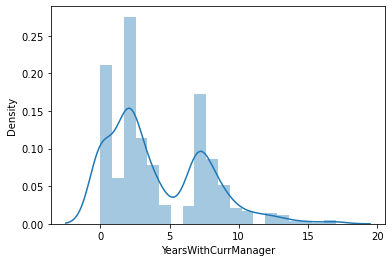

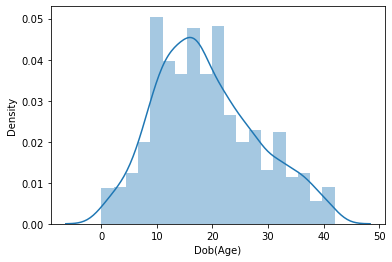

In [28]:
# Lets check Skewness using distplot
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

# Model Selection:

In [29]:
# Importing libraries for models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [30]:
# Lets assign values to x and y for model training and testing
x=df.iloc[:,1:df.shape[1]].values
y=df.iloc[:,0].values
macc=0
mrs=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>macc:
        macc=acc_score
        mrs=i

print("accuracy score is", macc,"Random State", mrs)

accuracy score is 89.40217391304348 Random State 748


In [31]:
# dividing 25% data for testing and remaining for training
# Lets import required libraries
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=748)

# Lets find best random state for Regression Models:

In [32]:
macc=0
mrs=0
for i in range(1,1000):
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_score=(accuracy_score(y_test,pred))*100
    
    if a_score>macc:
        macc=a_score
        mrs=i
print(" Accuracy Score: ", macc, "Random State", mrs)

 Accuracy Score:  89.40217391304348 Random State 1


#   ML Model for classification:

In [33]:
# Defining a classification model function master for all the models.
def classify(model,x,y):
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

* Here i have defined a class to perform train_test_split and training of ml model, we will be able to predict Label Value, Accuracy Score, Classification Report, Cross validation score, and the result of difference between the accuracy score and cross validation score for all the models.

# Logistic Regression:

In [34]:
m=LogisticRegression()
classify(m,x,y)

Accuracy Score: 89.40217391304348

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       325
           1       0.75      0.14      0.24        43

    accuracy                           0.89       368
   macro avg       0.82      0.57      0.59       368
weighted avg       0.88      0.89      0.86       368

Cross Validation Score: 84.48979591836736

Accuracy Score - Cross Validation Score is 4.91237799467612


# Support Vector Classifier:

In [35]:
m=SVC(C=1.0, kernel="rbf", gamma="auto", random_state=45)
classify(m,x,y)

Accuracy Score: 88.31521739130434

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       325
           1       0.00      0.00      0.00        43

    accuracy                           0.88       368
   macro avg       0.44      0.50      0.47       368
weighted avg       0.78      0.88      0.83       368

Cross Validation Score: 83.87755102040816

Accuracy Score - Cross Validation Score is 4.437666370896181


# K Neighbors Classifier:

In [36]:
m=KNeighborsClassifier(n_neighbors=15)
classify(m,x,y)

Accuracy Score: 87.77173913043478

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       325
           1       0.25      0.02      0.04        43

    accuracy                           0.88       368
   macro avg       0.57      0.51      0.49       368
weighted avg       0.81      0.88      0.83       368

Cross Validation Score: 84.01360544217688

Accuracy Score - Cross Validation Score is 3.7581336882578995


# Decision Tree Classifier:

In [37]:
m=DecisionTreeClassifier(random_state=32,max_depth=15)
classify(m,x,y)

Accuracy Score: 78.80434782608695

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.87       325
           1       0.25      0.42      0.32        43

    accuracy                           0.79       368
   macro avg       0.58      0.63      0.60       368
weighted avg       0.84      0.79      0.81       368

Cross Validation Score: 78.9795918367347

Accuracy Score - Cross Validation Score is -0.17524401064774509


# Random Forest Classifier:

In [38]:
m=RandomForestClassifier(max_depth=18, random_state=90)
classify(m,x,y)

Accuracy Score: 89.94565217391305

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       325
           1       0.65      0.30      0.41        43

    accuracy                           0.90       368
   macro avg       0.78      0.64      0.68       368
weighted avg       0.88      0.90      0.88       368

Cross Validation Score: 85.44217687074831

Accuracy Score - Cross Validation Score is 4.503475303164734


# Extra Trees Classifier:

In [39]:
m=ExtraTreesClassifier()
classify(m,x,y)

Accuracy Score: 89.13043478260869

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       325
           1       0.57      0.28      0.37        43

    accuracy                           0.89       368
   macro avg       0.74      0.63      0.66       368
weighted avg       0.87      0.89      0.87       368

Cross Validation Score: 85.91836734693878

Accuracy Score - Cross Validation Score is 3.2120674356699084


# Hyper Parameter Tuning:

In [40]:
# i am choosing Logistic Regression as the best model
param={'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

In [41]:
rm=GridSearchCV(DecisionTreeClassifier(),param,cv=5)

In [42]:
rm.fit(x_train,y_train)
rm.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 3,
 'random_state': 42,
 'splitter': 'random'}

In [43]:
rm.best_score_

0.8402797202797203

* As per Grid CV this is the best score details

In [44]:
final_model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=3,random_state=42,splitter='random')

classifier=final_model.fit(x_train,y_train)

rf_pred=final_model.predict(x_test)

rf_acc=(accuracy_score(y_test, rf_pred))*100
print("Accuracy Score from best model: ",rf_acc)

Accuracy Score from best model:  85.32608695652173


* here i was able to execute score of my final selected model, The score has improved by almost 9%.

# AUC ROC Curve:

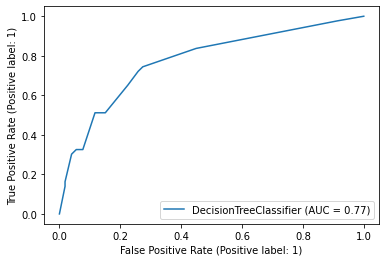

In [45]:
dis=metrics.plot_roc_curve(final_model, x_test, y_test)
plt.show()

* ROC curve for my final model, getting AUC score for my model to be of 81%.

# Confusion Matrix:

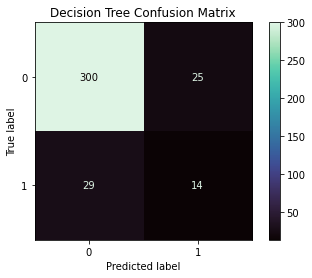

In [46]:
class_name=df.columns
metrics.plot_confusion_matrix(classifier, x_test,y_test, cmap='mako')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Saving Model:

In [53]:
# importing library to save model
import joblib
import pickle
file = "HRAnalytics1.pkl"
pickle.dump(final_model,open(file,'wb'))

# Loading the Model:

In [54]:
model1=pickle.load(open('HRAnalytics1.pkl','rb'))
Result=model1.score(x_test,y_test)
print(Result)

0.8532608695652174
